In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sqlite3

%matplotlib inline

In [12]:
# Create a connection to the SQLite database
conn = sqlite3.connect('../Data/db/fraude_detection_warehouse.db')

In [13]:
transactions = pd.read_sql('SELECT * FROM transactions', conn)
transactions.head()

,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud,location,amount
0,edde51a3fc2a4a4eb733d82dfa7ef1e0,114d79213a1d4c7fa5ca46b821adcbf0,acbf6432-7e94-47d9-b348-979fee7a02b3,depôt,2005-02-12,réussie,1,Yagoua,80175.613130
1,7921a0cd009b4872929dc81b9bcc2789,496687b96e6d435bb69e5e2c4274c614,1603b8f4-6814-42cc-a757-74c485ab572b,depôt,2021-07-20,échouée,1,Garoua,75642.607587
2,ffc077d8d3dd4db9b5b9ac4d98ce5747,b5418a7d9bd844d2a3b33e22aa9e644a,ea0ba924-e748-4845-af73-d1bf80b7b095,depôt,2013-10-02,réussie,0,Nkongsamba,14624.766399
3,f4cc6f49b36b446784486116dee866c4,66ae03d403a744e18b1b8698c7f2d9e2,bba8a3a4-d971-4caa-914b-b80a5cd9579b,depôt,2014-06-03,réussie,0,Ngou,7032.688374
4,9c37954010494aa7954eae6488878d4b,685a2ca4610840f6a609d49c606e47b8,baa4d08a-cb59-46df-ba90-73d1158493f6,transfert,2014-02-12,réussie,0,Bamenda,95388.059644


In [14]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    100000 non-null  object 
 1   customer_id       100000 non-null  object 
 2   device_id         100000 non-null  object 
 3   transaction_type  100000 non-null  object 
 4   transaction_date  100000 non-null  object 
 5   status            100000 non-null  object 
 6   is_fraud          100000 non-null  int64  
 7   location          100000 non-null  object 
 8   amount            100000 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 6.9+ MB


In [15]:
transactions.describe(include="all")

,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud,location,amount
count,100000,100000,100000,100000,100000,100000,100000.000000,100000,1.000000e+05
unique,100000,10000,63260,3,6938,2,NaN,102,NaN
top,edde51a3fc2a4a4eb733d82dfa7ef1e0,080a1baabb2c45a3b682dbacf81ed150,cede24f5-a76d-454d-a76d-79e168fe5d6a,depôt,2022-01-22,réussie,NaN,Yaoundé,NaN
freq,1,24,8,50178,30,89928,NaN,11460,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.331670,NaN,4.464798e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,0.470815,NaN,1.318363e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.019955e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,3.554416e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,7.130740e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.757573e+05


changing date type

In [16]:
transactions.transaction_date = pd.to_datetime(transactions.transaction_date)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    100000 non-null  object        
 1   customer_id       100000 non-null  object        
 2   device_id         100000 non-null  object        
 3   transaction_type  100000 non-null  object        
 4   transaction_date  100000 non-null  datetime64[ns]
 5   status            100000 non-null  object        
 6   is_fraud          100000 non-null  int64         
 7   location          100000 non-null  object        
 8   amount            100000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 6.9+ MB


### transaction_type

<Axes: xlabel='transaction_type', ylabel='count'>

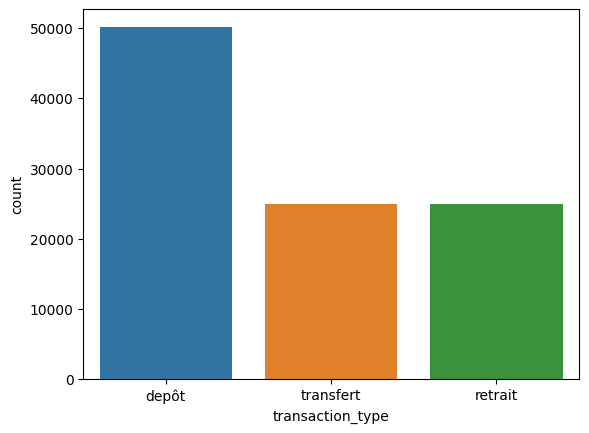

In [17]:
sns.countplot(transactions, x="transaction_type", hue='transaction_type')

In [18]:
transactions.transaction_type.value_counts().sort_values()

transaction_type
retrait      24889
transfert    24933
depôt        50178
Name: count, dtype: int64

In [19]:
length = transactions.shape[0]
# create dataframe percentage of transaction type
proportion = pd.DataFrame(transactions['transaction_type'].value_counts(normalize=True)*100)
proportion

,proportion
transaction_type,
depôt,50.178
transfert,24.933
retrait,24.889


### transaction amount

In [20]:
# transaction amount by transaction type
pd.DataFrame(transactions.groupby('transaction_type').amount.aggregate(['mean', 'median']))

,mean,median
transaction_type,,
depôt,443705.717381,71128.544611
retrait,455331.494599,72156.180369
transfert,443226.773779,71088.362042


In [21]:
transfert = transactions[transactions.transaction_type == 'transfert']
depot = transactions[transactions.transaction_type == 'depôt']
retrait = transactions[transactions.transaction_type == 'retrait']
type_list = [transfert, depot, retrait]


<Axes: xlabel='amount', ylabel='Count'>

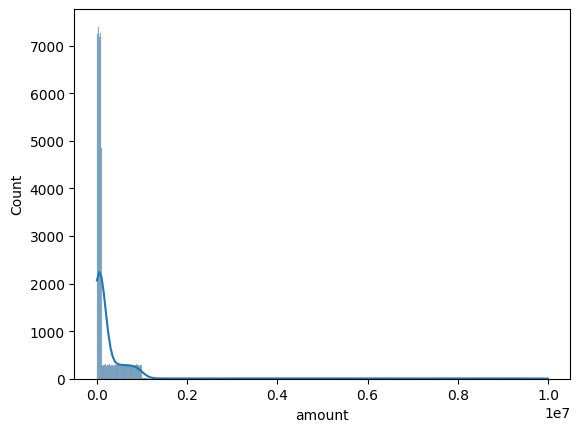

In [33]:
sns.histplot(transactions, x="amount", kde=True)

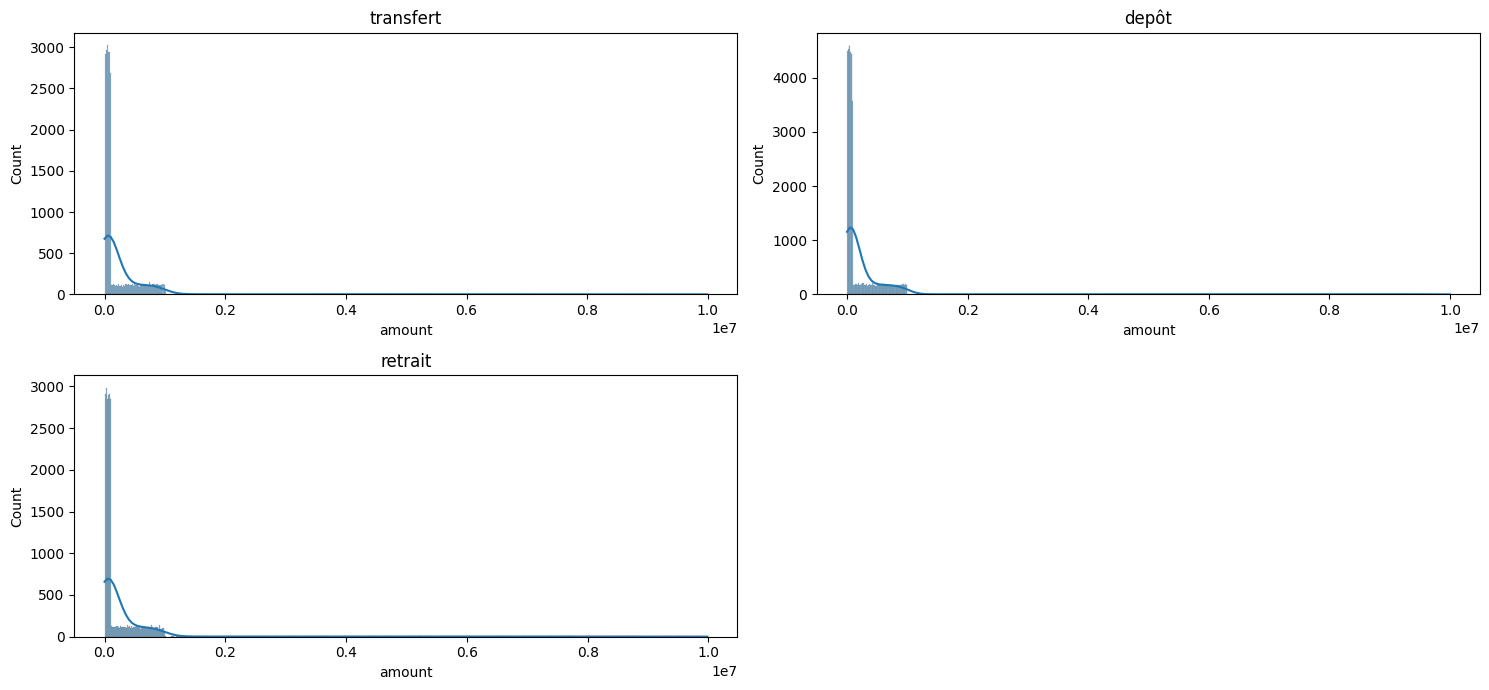

In [22]:
plt.figure(figsize=(15,7))
for i, value in enumerate(type_list, 1):
    plt.subplot(2,2,i)
    sns.histplot(value, x='amount', kde=True)
    plt.title(value.transaction_type.iloc[0])
    plt.tight_layout()
    plt.plot()

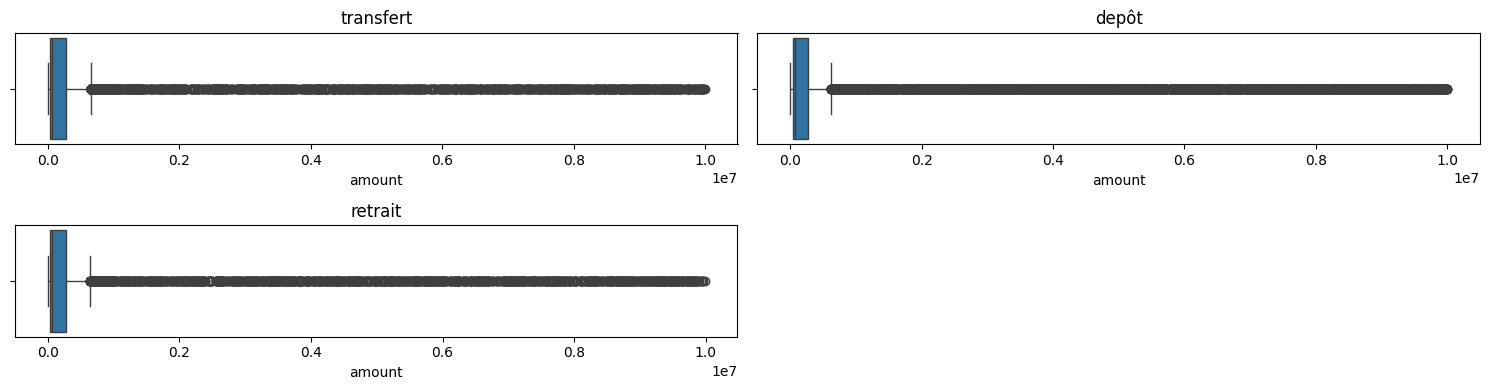

In [23]:
plt.figure(figsize=(15,4))
for i, value in enumerate(type_list, 1):
    plt.subplot(2,2,i)
    sns.boxplot(value, x='amount')
    plt.title(value.transaction_type.iloc[0])
    plt.tight_layout()
    plt.plot()

### Analyse temporelle

In [24]:
transactions['month'] = pd.to_datetime(transactions['transaction_date'].dt.strftime('%Y-%m'))
transactions['week'] = transactions['transaction_date'].dt.isocalendar().week
transactions['month_number'] = transactions['transaction_date'].dt.month
transactions['year'] = transactions['transaction_date'].dt.year

In [25]:
transactions_copy = transactions.set_index('transaction_date')
transactions_copy.head()

,transaction_id,customer_id,device_id,transaction_type,status,is_fraud,location,amount,month,week,month_number,year
transaction_date,,,,,,,,,,,,
2005-02-12,edde51a3fc2a4a4eb733d82dfa7ef1e0,114d79213a1d4c7fa5ca46b821adcbf0,acbf6432-7e94-47d9-b348-979fee7a02b3,depôt,réussie,1,Yagoua,80175.613130,2005-02-01,6,2,2005
2021-07-20,7921a0cd009b4872929dc81b9bcc2789,496687b96e6d435bb69e5e2c4274c614,1603b8f4-6814-42cc-a757-74c485ab572b,depôt,échouée,1,Garoua,75642.607587,2021-07-01,29,7,2021
2013-10-02,ffc077d8d3dd4db9b5b9ac4d98ce5747,b5418a7d9bd844d2a3b33e22aa9e644a,ea0ba924-e748-4845-af73-d1bf80b7b095,depôt,réussie,0,Nkongsamba,14624.766399,2013-10-01,40,10,2013
2014-06-03,f4cc6f49b36b446784486116dee866c4,66ae03d403a744e18b1b8698c7f2d9e2,bba8a3a4-d971-4caa-914b-b80a5cd9579b,depôt,réussie,0,Ngou,7032.688374,2014-06-01,23,6,2014
2014-02-12,9c37954010494aa7954eae6488878d4b,685a2ca4610840f6a609d49c606e47b8,baa4d08a-cb59-46df-ba90-73d1158493f6,transfert,réussie,0,Bamenda,95388.059644,2014-02-01,7,2,2014


Montant de transaction par jour

In [26]:
transactions_per_day = pd.DataFrame(transactions_copy.groupby('transaction_date').amount.aggregate("mean")).reset_index()
fig = px.line(transactions_per_day, x='transaction_date', y='amount', title='transactions_per_day amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Montant de transaction par mois

In [27]:
transactions_per_month = pd.DataFrame(transactions_copy.groupby("month").amount.aggregate('mean')).reset_index()
fig = px.line(transactions_per_month, x='month', y='amount', title='transactions_per_month amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Montant de transaction par an

In [28]:
transactions_per_month = pd.DataFrame(transactions_copy.groupby("year").amount.aggregate('mean')).reset_index()
fig = px.line(transactions_per_month, x='year', y='amount', title='transactions_per_month amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par jour

In [29]:
transactions_per_day_nbr = pd.DataFrame(transactions_copy.groupby("transaction_date").transaction_id.count()).reset_index()
fig = px.line(transactions_per_day_nbr, x='transaction_date', y='transaction_id', title='transactions_per_day_nbr')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par mois

In [30]:
transactions_per_month_nbr = pd.DataFrame(transactions_copy.groupby("month").transaction_id.count()).reset_index()
fig = px.line(transactions_per_month_nbr, x='month', y='transaction_id', title='transactions_per_month_nbr')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par an

In [31]:
transactions_per_month_nbr = pd.DataFrame(transactions_copy.groupby("year").transaction_id.count()).reset_index()
fig = px.line(transactions_per_month_nbr, x='year', y='transaction_id', title='transactions_per_month_nbr')

fig.update_xaxes(rangeslider_visible=True)